In [15]:
from pydub import AudioSegment
import os
import numpy as np
import scipy.io.wavfile
from scipy.fftpack import dct
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

### Load file

In [110]:
AUDIO_PATH = 'dataset/speech010001.wav'
signal , sample_rate = librosa.load(AUDIO_PATH)  # File assumed to be in the same directory
print('samples: \n', signal) 
print('sample_shape: ', signal.shape) 
print('sample_rate: ', sample_rate) 



samples: 
 [0.01071885 0.02681679 0.02245884 ... 0.00688681 0.00566395 0.00620133]
sample_shape:  (176400,)
sample_rate:  22050


In [88]:
ipd.Audio(AUDIO_PATH)

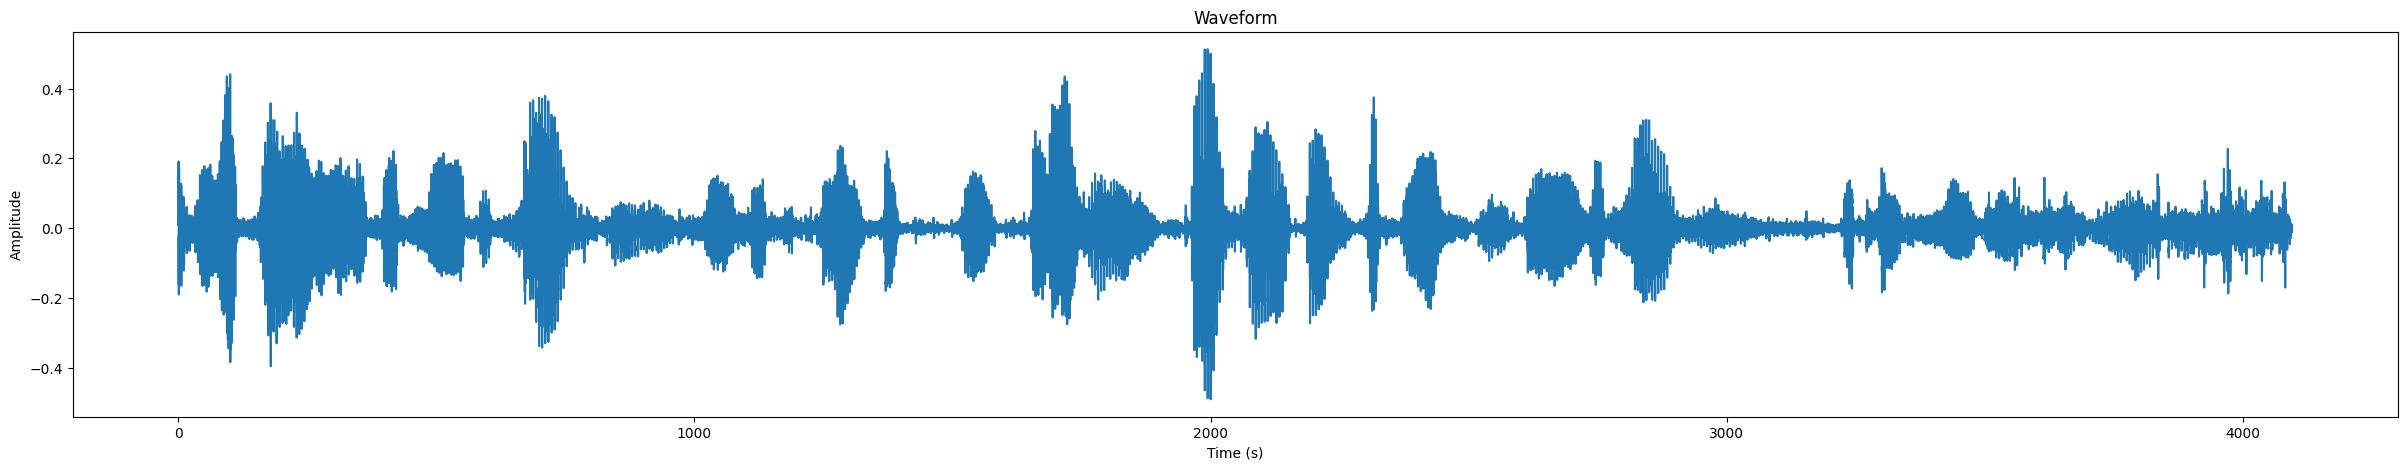

In [111]:
time = librosa.times_like(signal, sr=sample_rate)
plt.figure(figsize=(30, 5))
plt.plot(time, signal)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

### Extract MFCCs

In [112]:
mfccs = librosa.feature.mfcc(y = signal, n_mfcc= 13, sr = sample_rate)
mfccs.shape

(13, 345)

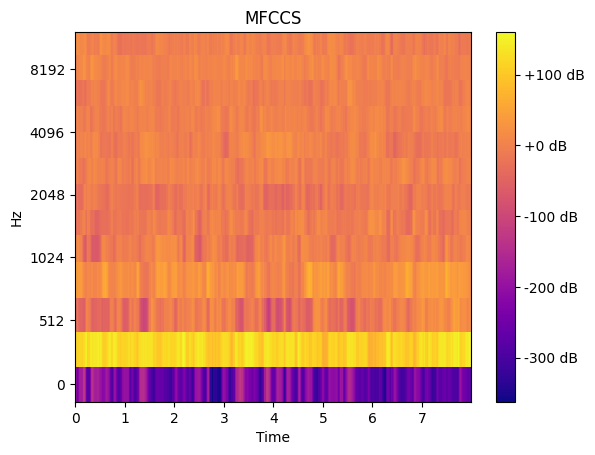

(13, 345)


In [121]:
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time',  y_axis='mel', cmap = 'plasma')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCCS')
plt.xlabel('Time')
plt.show()
print(mfccs.shape)

### Calculate delta and  delta2 MFCCs

In [122]:
delta_mfccs = librosa.feature.delta(mfccs)
delta2_mfccs = librosa.feature.delta(mfccs, order = 2)
print('delta_mfccs.shape' , delta_mfccs.shape)
print('mfccs.shape' , mfccs.shape)



delta_mfccs.shape (13, 345)
mfccs.shape (13, 345)


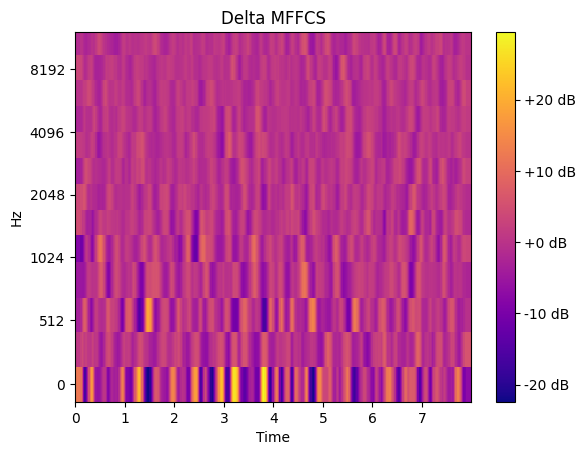

(13, 345)


In [123]:
librosa.display.specshow(delta_mfccs, sr=sample_rate, x_axis='time', y_axis='mel',cmap = 'plasma')
plt.colorbar(format='%+2.0f dB')
plt.title('Delta MFFCS')
plt.xlabel('Time')
plt.show()
print(mfccs.shape)

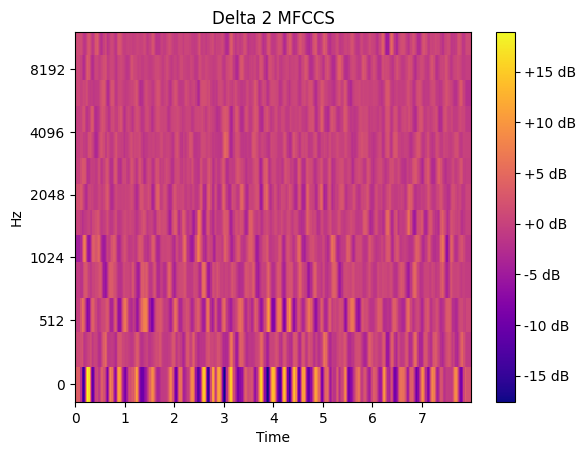

(13, 345)


In [120]:
librosa.display.specshow(delta2_mfccs, sr=sample_rate, x_axis='time', y_axis='mel', cmap = 'plasma')
plt.colorbar(format='%+2.0f dB')
plt.title('Delta 2 MFCCS')
plt.xlabel('Time')
plt.show()
print(mfccs.shape)

In [116]:
mfcc = np.concatenate((mfccs, delta_mfccs, delta2_mfccs), axis=0)
print(mfcc.shape)

(39, 345)


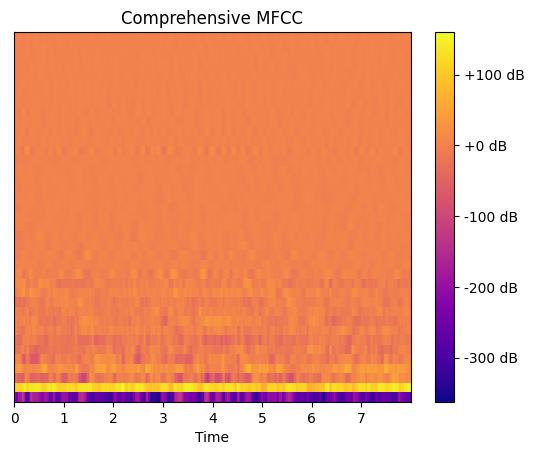

(13, 345)


In [124]:
librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time', cmap = 'plasma')
plt.colorbar(format='%+2.0f dB')
plt.title('Comprehensive MFCC')
plt.xlabel('Time')
plt.show()
print(mfccs.shape)